###### DataSet Location
###### https://archive.ics.uci.edu/ml/datasets/bank+marketing

###### The DataSet is from UCI Machine Learning Repository. The Data is collected from marketing campaigns of a Portuguese banking institution. The campaigns were based on phone calls. The reponse variable here was the bank term deposit would be Yes or No. So it is a Binary Classification Problem. The Classification goal is to predict if the client will subscribe yes/no to a term deposit.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

In [6]:
data =pd.read_csv('bank-additional-full.csv',sep=';')

In [7]:
data.shape

(41188, 21)

###### The DataSet has 41188 instances and 20 features and a response variable.

In [8]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

###### Null values in the DataSet

In [10]:
Null_values_data=data.isnull().sum()/len(data)*100
Null_values_data

age               0.0
job               0.0
marital           0.0
education         0.0
default           0.0
housing           0.0
loan              0.0
contact           0.0
month             0.0
day_of_week       0.0
duration          0.0
campaign          0.0
pdays             0.0
previous          0.0
poutcome          0.0
emp.var.rate      0.0
cons.price.idx    0.0
cons.conf.idx     0.0
euribor3m         0.0
nr.employed       0.0
y                 0.0
dtype: float64

###### There are no null values in the DataSet.

In [11]:
dtype_attribute=data.columns.to_series().groupby(data.dtypes).groups
dtype_attribute

{dtype('int64'): Index(['age', 'duration', 'campaign', 'pdays', 'previous'], dtype='object'),
 dtype('float64'): Index(['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
        'nr.employed'],
       dtype='object'),
 dtype('O'): Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
        'month', 'day_of_week', 'poutcome', 'y'],
       dtype='object')}

###### There are three DataTypes in DataSet.Dtype int64, float64 and object.


In [12]:
int64_list =[x for x in data.columns if data[x].dtype=='int64']
int64_list

['age', 'duration', 'campaign', 'pdays', 'previous']

###### Features with integer values.

In [13]:
float64_list =[x for x in data.columns if data[x].dtype=='float64']
float64_list

['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

###### Features with float values

In [14]:
categorical_list =[x for x in data.columns if data[x].dtype==object]
categorical_list

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'y']

###### Features with categorical values

In [15]:
unique_values_dict ={}
for i in categorical_list:
    li=[]
    unique_values_dict[i]=data[i].unique()

In [16]:
print("Categorical Features Types")
for i in categorical_list:
    print(i)
    print(unique_values_dict[i])

Categorical Features Types
job
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
marital
['married' 'single' 'divorced' 'unknown']
education
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
default
['no' 'unknown' 'yes']
housing
['no' 'yes' 'unknown']
loan
['no' 'yes' 'unknown']
contact
['telephone' 'cellular']
month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
day_of_week
['mon' 'tue' 'wed' 'thu' 'fri']
poutcome
['nonexistent' 'failure' 'success']
y
['no' 'yes']


###### These are features for which we will use One Hot Encoding.One hot encoding transforms categorical features to a format that works better with classification and regression algorithms.Here we will use binary variables for each observation with N distinct values.

###### Response variable with value counts

In [17]:
data['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

###### The value No here indicate the people who didnot avail any service from the bank and Yes are the people who became the customers of the bank

In [24]:
percentage_counts = data['y'].value_counts()

In [26]:
yes_percentage = percentage_counts['yes']/(percentage_counts['yes'] + percentage_counts['no'])

In [27]:
print("The percentage of people who became future customers of bank {:.3f} "
      .format(yes_percentage))

The percentage of people who became future customers of bank 0.113 


#### The percentage of people who became future customers of bank are 0.113

In [29]:
no_percentage = percentage_counts['no']/(percentage_counts['yes'] + percentage_counts['no'])

In [30]:
print("The percentage of people who didnot avail banking service {:.3f} "
      .format(no_percentage))

The percentage of people who didnot avail banking service 0.887 


#### The percentage of people who didnot avail banking service are 0.887

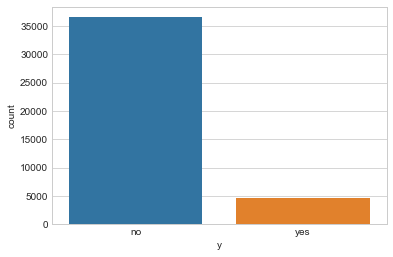

In [31]:
sns.set_style('whitegrid')
sns.countplot(data=data,x='y')

###### The plot here clearly indicates that it is a class imbalance problem with a majority class as No and only 11.3% as Yes

###### Count of Yes and No values for features with categorical values

In [32]:
df_marital = data.groupby(['marital','y'])['y'].count().unstack()

In [33]:
df_marital

y,no,yes
marital,,
divorced,4136,476
married,22396,2532
single,9948,1620
unknown,68,12


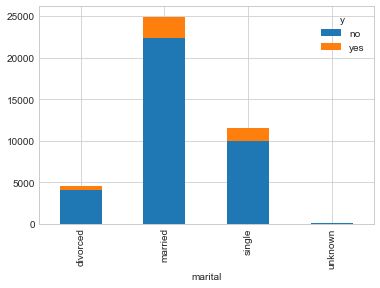

In [34]:
df_marital[['no','yes']].plot(kind='bar', stacked=True)

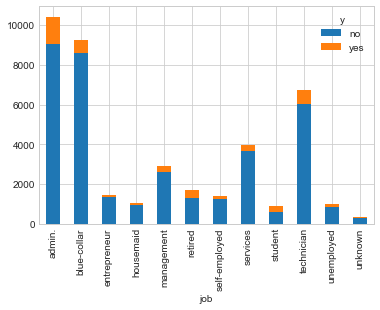

In [35]:
df_job = data.groupby(['job','y'])['y'].count().unstack()
df_job[['no','yes']].plot(kind='bar', stacked=True)

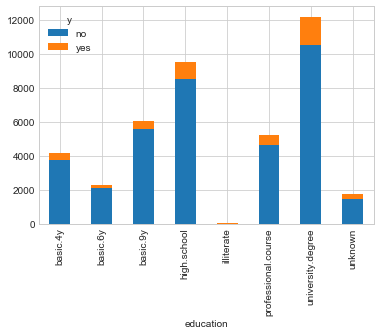

In [36]:
df_education = data.groupby(['education','y'])['y'].count().unstack()
df_education[['no','yes']].plot(kind='bar', stacked=True)

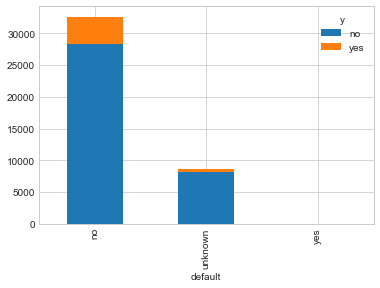

In [37]:
df_default = data.groupby(['default','y'])['y'].count().unstack()
df_default[['no','yes']].plot(kind='bar', stacked=True)

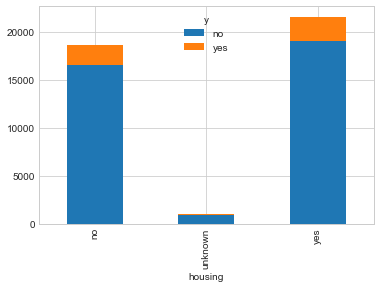

In [38]:
df_housing = data.groupby(['housing','y'])['y'].count().unstack()
df_housing[['no','yes']].plot(kind='bar', stacked=True)

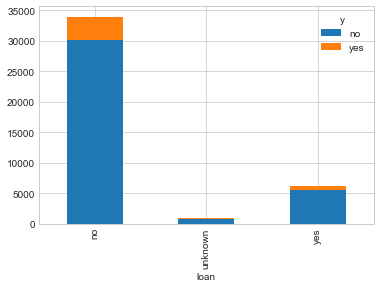

In [39]:
df_loan = data.groupby(['loan','y'])['y'].count().unstack()
df_loan[['no','yes']].plot(kind='bar', stacked=True)

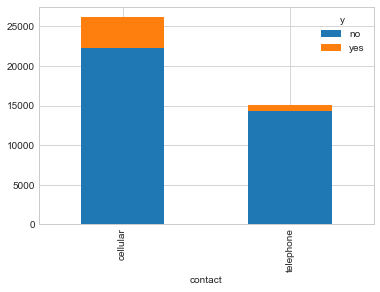

In [40]:
df_contact = data.groupby(['contact','y'])['y'].count().unstack()
df_contact[['no','yes']].plot(kind='bar', stacked=True)

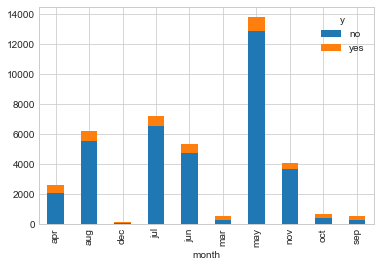

In [41]:
df_month = data.groupby(['month','y'])['y'].count().unstack()
df_month[['no','yes']].plot(kind='bar', stacked=True)

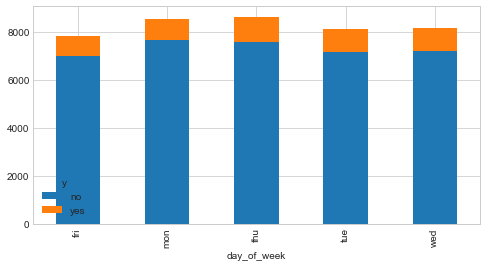

In [42]:
df_day_of_week = data.groupby(['day_of_week','y'])['y'].count().unstack()
df_day_of_week[['no','yes']].plot(kind='bar', stacked=True,figsize=(8,4))

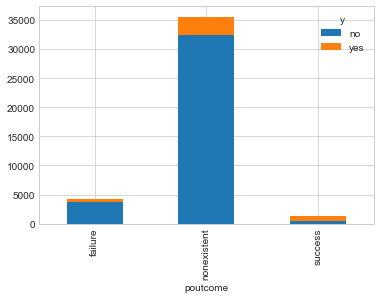

In [43]:
df_poutcome = data.groupby(['poutcome','y'])['y'].count().unstack()
df_poutcome[['no','yes']].plot(kind='bar', stacked=True)

###### Correlation of features with respect to response variable and among themselves

In [44]:
dict_y ={"y":{'yes':1,'no':0}}
data.replace(dict_y,inplace = True)

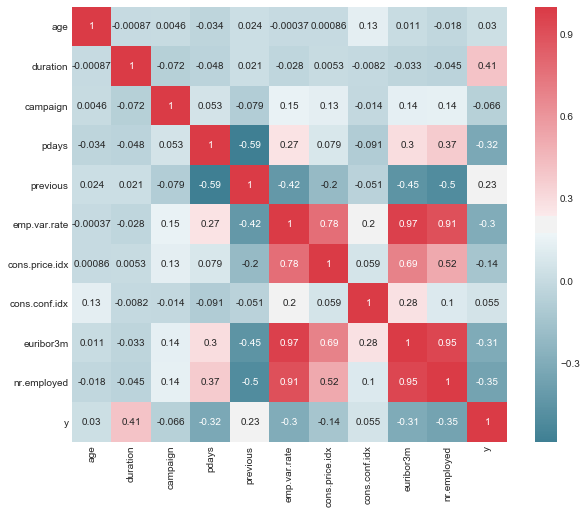

In [45]:
f, ax = plt.subplots(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax,annot=True)

###### Summary of various Numerical columns in dataset

In [46]:
data.describe()[['age','duration','campaign','pdays','previous']]

,age,duration,campaign,pdays,previous
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963
std,10.42125,259.279249,2.770014,186.910907,0.494901
min,17.00000,0.000000,1.000000,0.000000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000


In [47]:
data.describe()[['emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']]

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,1.570960,0.578840,4.628198,1.734447,72.251528
min,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [48]:
#Box plot to determine the IQR
#data['age'].max()
sns.set_style('whitegrid')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11ebf29e8>]], dtype=object)

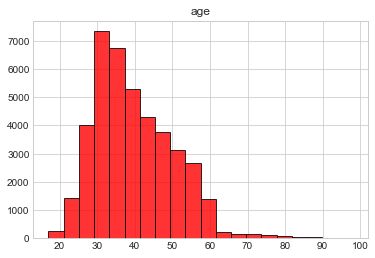

In [49]:
pd.DataFrame.hist(data,column='age',color='r',bins=20,alpha=0.8,histtype='bar',ec='black')

###### Call Duration for Marital status in various job domains.

In [50]:
df_marital=data[['duration','job','marital']].groupby(['marital','job']).count()

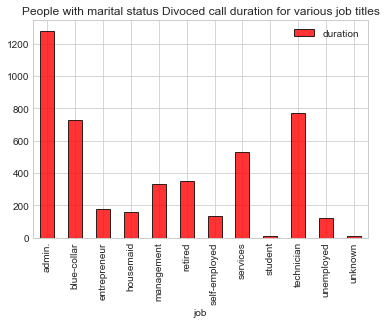

In [51]:
df_marital.loc['divorced'].plot(kind='bar',color = 'r',alpha = 0.8,ec='black')
plt.title('People with marital status Divoced call duration for various job titles')

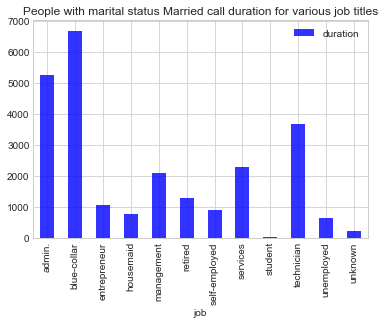

In [52]:
df_marital.loc['married'].plot(kind='bar',color = 'b',alpha = 0.8)
plt.title('People with marital status Married call duration for various job titles')

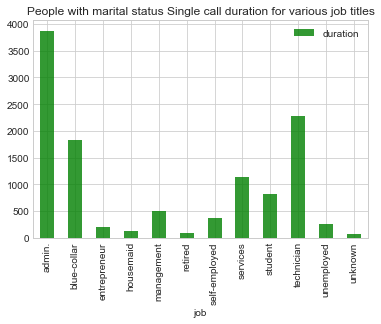

In [53]:
df_marital.loc['single'].plot(kind='bar',color = 'g',alpha = 0.8)
plt.title('People with marital status Single call duration for various job titles')

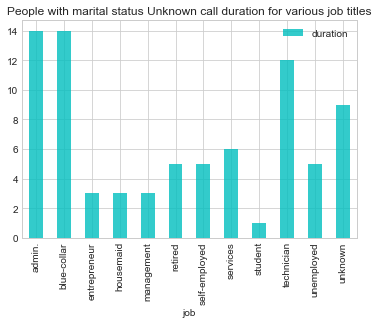

In [54]:
df_marital.loc['unknown'].plot(kind='bar',color = 'c',alpha = 0.8)
plt.title('People with marital status Unknown call duration for various job titles')

In [55]:
data[['duration','y']]

,duration,y
0,261,0
1,149,0
2,226,0
3,151,0
4,307,0
5,198,0
6,139,0
7,217,0
8,380,0
9,50,0


In [56]:
data[data['duration'] >900 ]['y'].value_counts()

1    760
0    521
Name: y, dtype: int64

In [57]:
data_duration = data[['duration','y']]

In [58]:
data_duration_600 =  data_duration[data_duration['duration'] > 600]

In [59]:
data_duration_600['y'].value_counts()

0    1780
1    1684
Name: y, dtype: int64

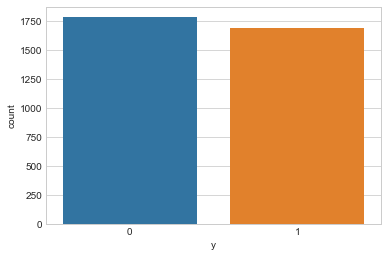

In [60]:
sns.countplot(data=data_duration_600,x='y')

In [61]:
data_duration_50 =  data_duration[data_duration['duration'] < 50]

In [62]:
data_duration_50['y'].value_counts()

0    3101
1       1
Name: y, dtype: int64

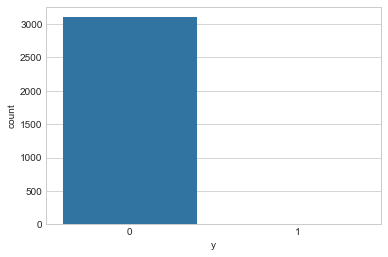

In [63]:
sns.countplot(data=data_duration_50,x='y')